In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB,BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,roc_curve,confusion_matrix,classification_report,ConfusionMatrixDisplay

In [71]:
data=pd.read_csv('Bank_Personal_Loan_Modelling.csv')
df=pd.DataFrame(data)
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1/90,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0/40,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0/30,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0/50,2,0,0,0,0,1,0


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   ID                  5000 non-null   int64 
 1   Age                 5000 non-null   int64 
 2   Experience          5000 non-null   int64 
 3   Income              5000 non-null   int64 
 4   ZIP Code            5000 non-null   int64 
 5   Family              5000 non-null   int64 
 6   CCAvg               5000 non-null   object
 7   Education           5000 non-null   int64 
 8   Mortgage            5000 non-null   int64 
 9   Personal Loan       5000 non-null   int64 
 10  Securities Account  5000 non-null   int64 
 11  CD Account          5000 non-null   int64 
 12  Online              5000 non-null   int64 
 13  CreditCard          5000 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 547.0+ KB


In [73]:
df.describe()

,ID,Age,Experience,Income,ZIP Code,Family,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [74]:
df.drop(columns=['ID'],inplace=True)

In [75]:
df=df[df['Experience']>=0]
df

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,91107,4,1/60,1,0,0,1,0,0,0
1,45,19,34,90089,3,1/50,1,0,0,1,0,0,0
2,39,15,11,94720,1,1/00,1,0,0,0,0,0,0
3,35,9,100,94112,1,2/70,2,0,0,0,0,0,0
4,35,8,45,91330,4,1/00,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,92697,1,1/90,3,0,0,0,0,1,0
4996,30,4,15,92037,4,0/40,1,85,0,0,0,1,0
4997,63,39,24,93023,2,0/30,3,0,0,0,0,0,0
4998,65,40,49,90034,3,0/50,2,0,0,0,0,1,0


In [76]:
df=df[df['CCAvg'].str.contains('/0')!=1]
df.reset_index(inplace=True)
for i in range (len(df['CCAvg'])):
    df['CCAvg'][i]=eval(df['CCAvg'][i])
df

,index,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,0,25,1,49,91107,4,0.016667,1,0,0,1,0,0,0
1,1,45,19,34,90089,3,0.02,1,0,0,1,0,0,0
2,3,35,9,100,94112,1,0.028571,2,0,0,0,0,0,0
3,5,37,13,29,92121,4,0.0,2,155,0,0,0,1,0
4,6,53,27,72,91711,2,0.02,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4267,4995,29,3,40,92697,1,0.011111,3,0,0,0,0,1,0
4268,4996,30,4,15,92037,4,0.0,1,85,0,0,0,1,0
4269,4997,63,39,24,93023,2,0.0,3,0,0,0,0,0,0
4270,4998,65,40,49,90034,3,0.0,2,0,0,0,0,1,0


In [77]:
len( df['ZIP Code'].unique())

464

In [78]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,index,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
index,1.000000,-0.014473,-0.013277,-0.018006,0.009520,-0.028704,-0.023037,0.016862,-0.005640,-0.026414,-0.007481,-0.009564,0.002849,0.008585
Age,-0.014473,1.000000,0.995162,-0.077806,-0.026954,-0.032088,-0.053969,0.029984,-0.014618,-0.022104,-0.002715,-0.009976,0.010212,-0.000275
Experience,-0.013277,0.995162,1.000000,-0.068719,-0.025769,-0.035376,-0.048367,0.007042,-0.013244,-0.020862,-0.003128,-0.007813,0.011718,0.000530
Income,-0.018006,-0.077806,-0.068719,1.000000,-0.017879,-0.140843,0.418791,-0.195119,0.210720,0.514504,0.004417,0.177452,0.014057,-0.004226
ZIP Code,0.009520,-0.026954,-0.025769,-0.017879,1.000000,-0.001674,-0.014645,-0.015289,0.000314,-0.002082,0.005808,0.019962,0.018102,0.000077
Family,-0.028704,-0.032088,-0.035376,-0.140843,-0.001674,1.000000,-0.032324,0.046096,-0.022648,0.063234,0.014571,0.021267,-0.002144,0.020223
CCAvg,-0.023037,-0.053969,-0.048367,0.418791,-0.014645,-0.032324,1.000000,-0.079311,0.074307,0.279902,0.015762,0.116026,-0.004927,-0.011129
Education,0.016862,0.029984,0.007042,-0.195119,-0.015289,0.046096,-0.079311,1.000000,-0.029383,0.133170,-0.011355,0.007677,-0.022943,-0.001898
Mortgage,-0.005640,-0.014618,-0.013244,0.210720,0.000314,-0.022648,0.074307,-0.029383,1.000000,0.148355,-0.009557,0.096475,0.003811,0.002573
Personal Loan,-0.026414,-0.022104,-0.020862,0.514504,-0.002082,0.063234,0.279902,0.133170,0.148355,1.000000,0.023762,0.321759,0.009586,0.001913


<Axes: xlabel='Income', ylabel='Age'>

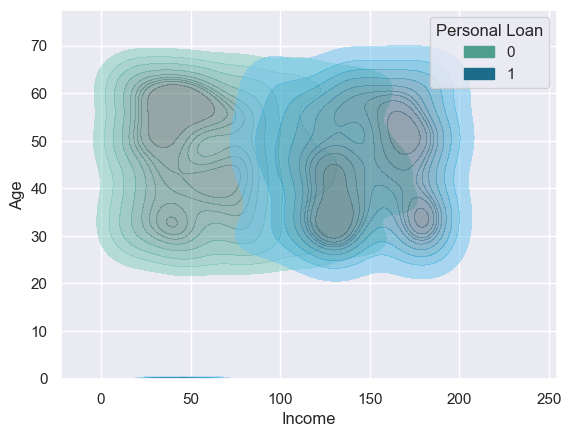

In [133]:
sns.kdeplot(x=df['Income'], y=df['Age'],hue=df['Personal Loan'],shade=True,fill=True,common_norm=False,palette='crest',
            alpha=0.5,linewidth=0)



<Axes: xlabel='Age', ylabel='CCAvg'>

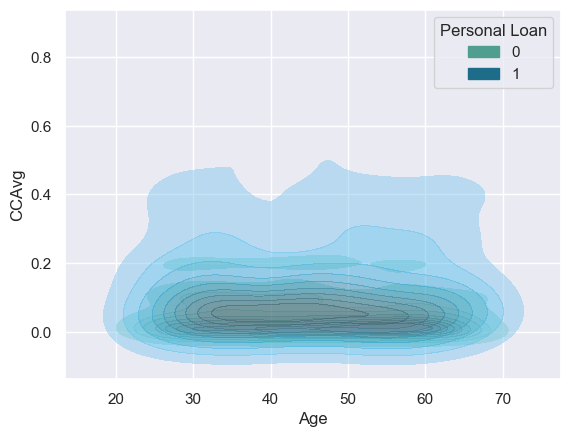

In [136]:
sns.kdeplot(x=df['Age'], y=df['CCAvg'],hue=df['Personal Loan'],shade=True,fill=True,common_norm=False,palette='crest',
            alpha=0.5,linewidth=0)

<Axes: xlabel='Income'>

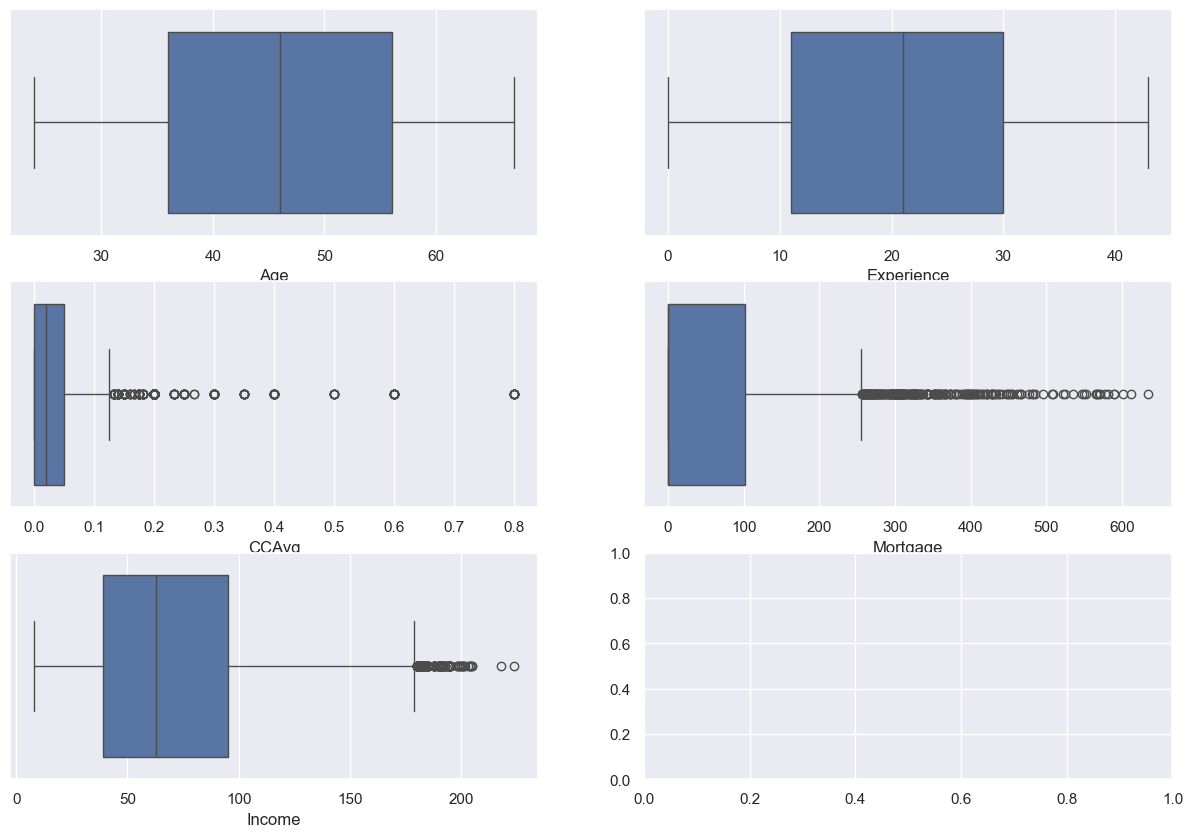

In [120]:
fig, axes = plt.subplots(3,2,figsize=(15,10))
sns.boxplot(data=df, x='Age', ax=axes[0,0])
sns.boxplot(data=df, x='Experience', ax=axes[0,1])
sns.boxplot(data=df, x='CCAvg', ax=axes[1,0])
sns.boxplot(data=df, x='Mortgage', ax=axes[1,1])
sns.boxplot(data=df, x='Income', ax=axes[2,])


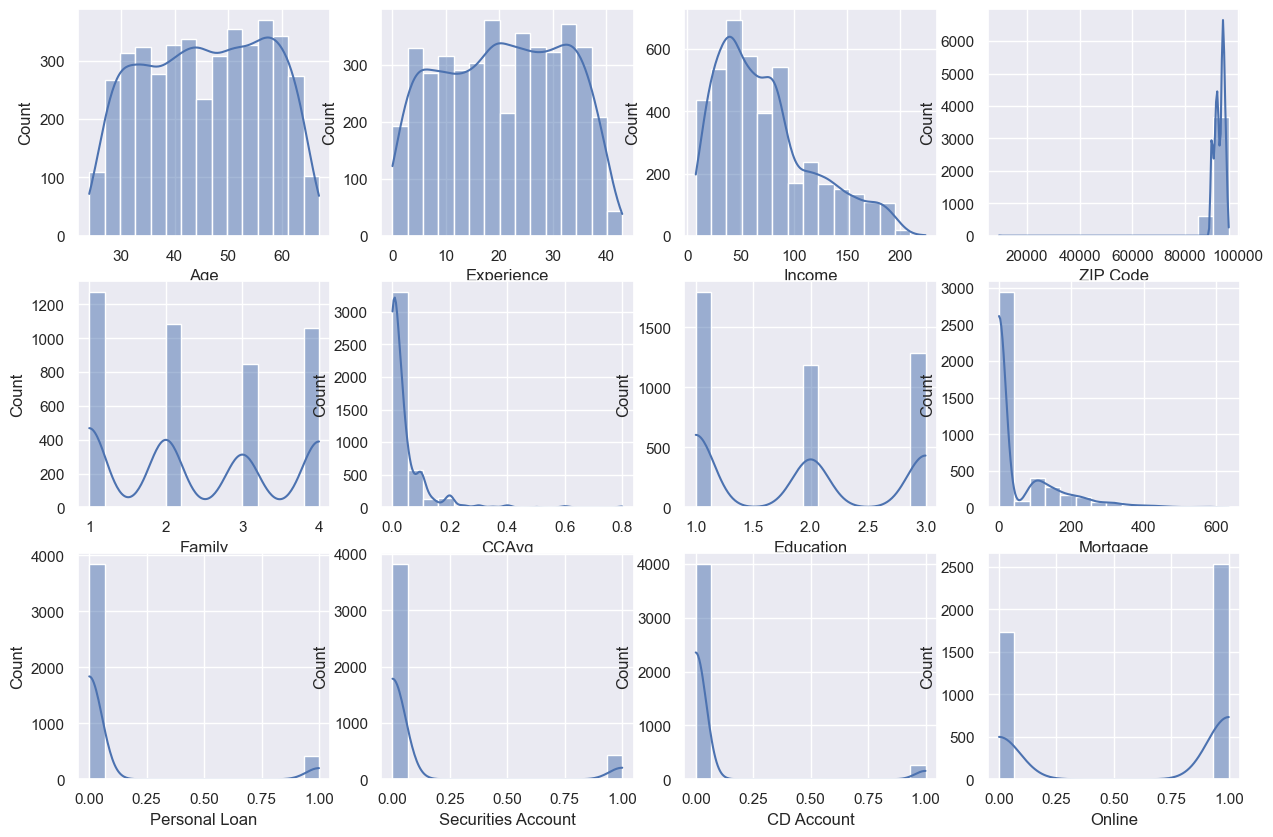

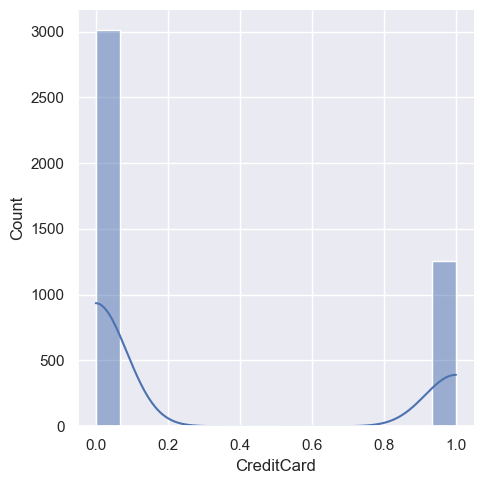

In [80]:
sns.set()
fig, axes = plt.subplots(3,4,figsize=(15,10))
# #create boxplot in each subplot
# # sns.boxplot(data=df, x='team', y='blocks', ax=axes[1,1])
sns.histplot(df['Age'], kde=True, bins=15,ax=axes[0,0])
sns.histplot(df['Experience'], kde=True, bins=15,ax=axes[0,1])
sns.histplot(df['Income'], kde=True, bins=15,ax=axes[0,2])
sns.histplot(df['ZIP Code'], kde=True, bins=15,ax=axes[0,3])
sns.histplot(df['Family'], kde=True, bins=15,ax=axes[1,0])
sns.histplot(df['CCAvg'], kde=True, bins=15,ax=axes[1,1])
sns.histplot(df['Education'], kde=True, bins=15,ax=axes[1,2])
sns.histplot(df['Mortgage'], kde=True, bins=15,ax=axes[1,3])
sns.histplot(df['Personal Loan'], kde=True, bins=15,ax=axes[2,0])
sns.histplot(df['Securities Account'], kde=True, bins=15,ax=axes[2,1])
sns.histplot(df['CD Account'], kde=True, bins=15,ax=axes[2,2])
sns.histplot(df['Online'], kde=True, bins=15,ax=axes[2,3])
sns.displot(df['CreditCard'], kde=True, bins=15)


In [81]:
df.drop(columns=['ZIP Code','index'],inplace=True)

In [82]:
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,0.016667,1,0,0,1,0,0,0
1,45,19,34,3,0.02,1,0,0,1,0,0,0
2,35,9,100,1,0.028571,2,0,0,0,0,0,0
3,37,13,29,4,0.0,2,155,0,0,0,1,0
4,53,27,72,2,0.02,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4267,29,3,40,1,0.011111,3,0,0,0,0,1,0
4268,30,4,15,4,0.0,1,85,0,0,0,1,0
4269,63,39,24,2,0.0,3,0,0,0,0,0,0
4270,65,40,49,3,0.0,2,0,0,0,0,1,0


Age
Experience
Income
Family
CCAvg
Education
Mortgage
Personal Loan
Securities Account
CD Account
Online
CreditCard


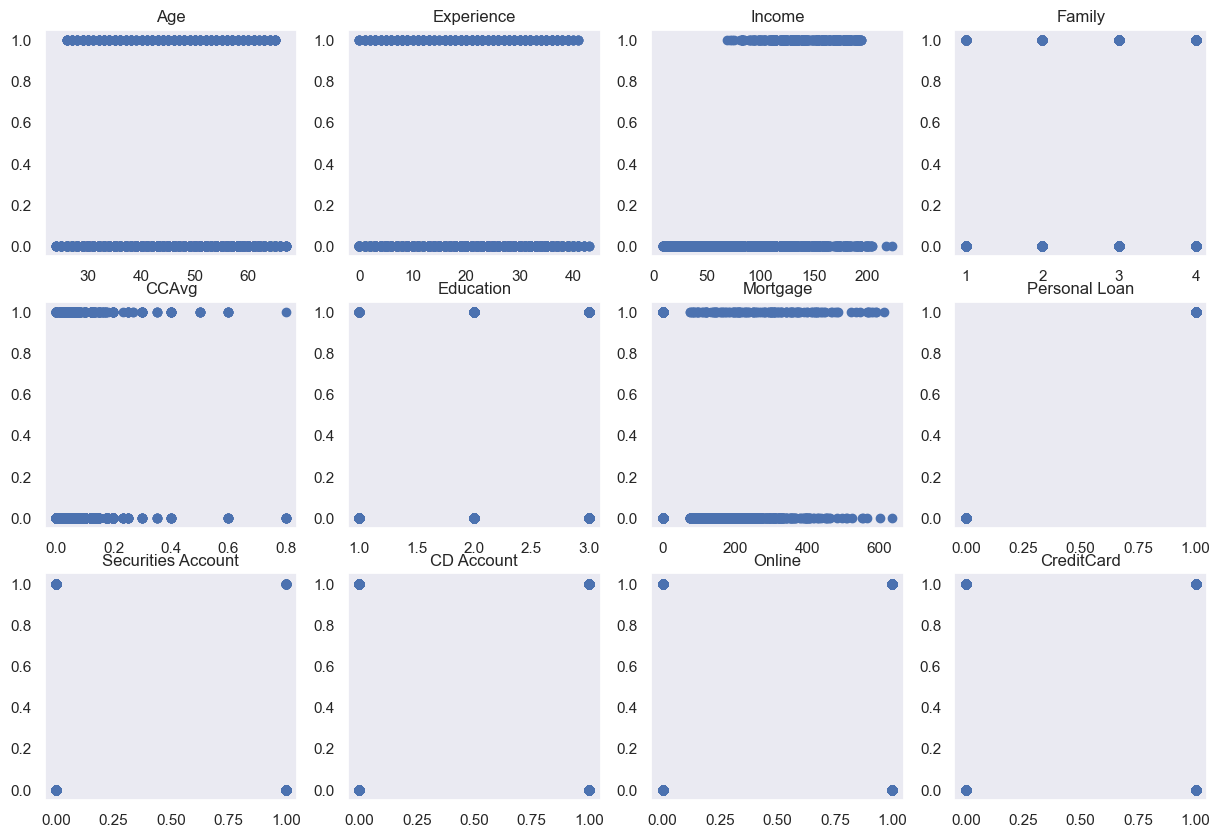

In [83]:
fig, axs = plt.subplots(3,4,figsize=(15,10))
i=0
j=0
for col in df.columns:
    axs[i,j].scatter(df[col],df['Personal Loan'])
    axs[i,j].grid();axs[i,j].set_title(col)
    j+=1
    if(j==4):
        i+=1
        j=0
    print(col)

In [84]:
df

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,0.016667,1,0,0,1,0,0,0
1,45,19,34,3,0.02,1,0,0,1,0,0,0
2,35,9,100,1,0.028571,2,0,0,0,0,0,0
3,37,13,29,4,0.0,2,155,0,0,0,1,0
4,53,27,72,2,0.02,2,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4267,29,3,40,1,0.011111,3,0,0,0,0,1,0
4268,30,4,15,4,0.0,1,85,0,0,0,1,0
4269,63,39,24,2,0.0,3,0,0,0,0,0,0
4270,65,40,49,3,0.0,2,0,0,0,0,1,0


In [85]:
df2=df[df['Personal Loan']==1]
df3=df[df['Personal Loan']==0]

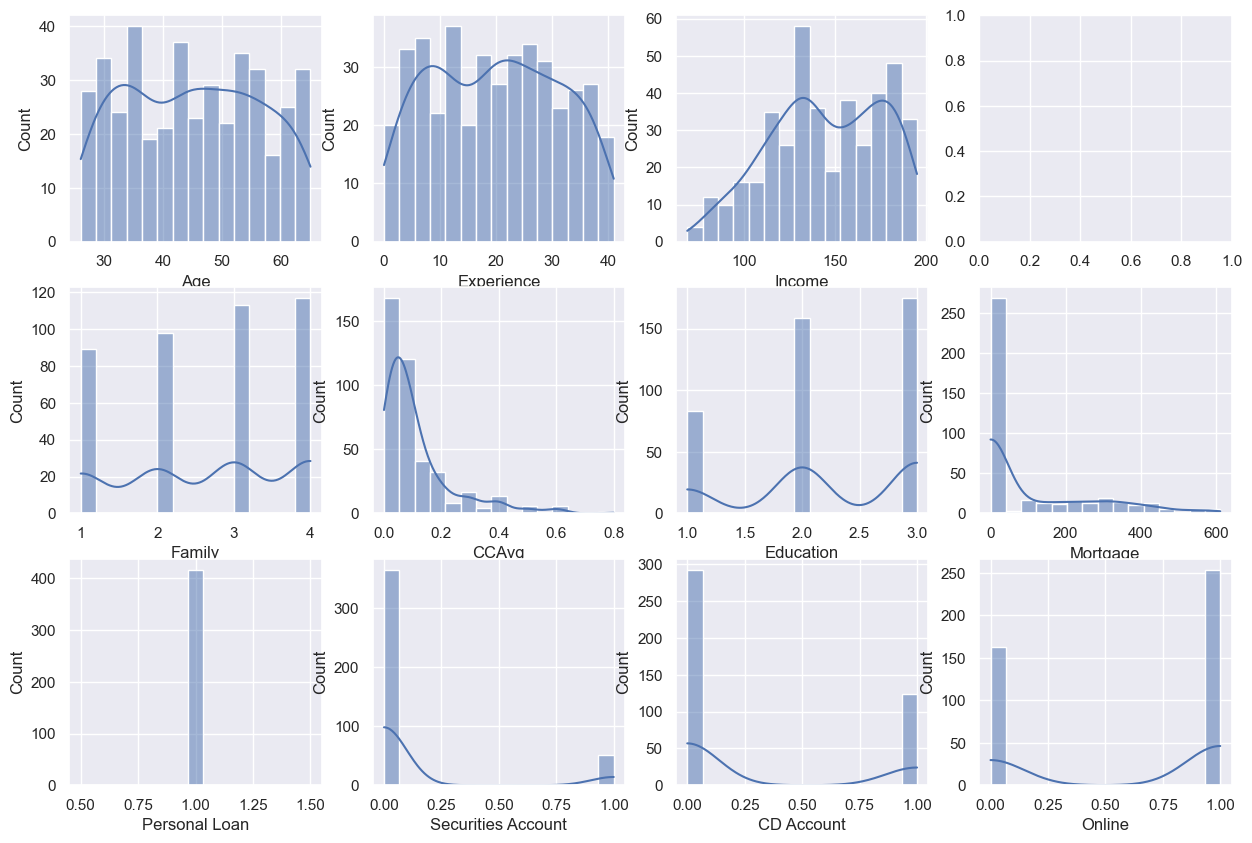

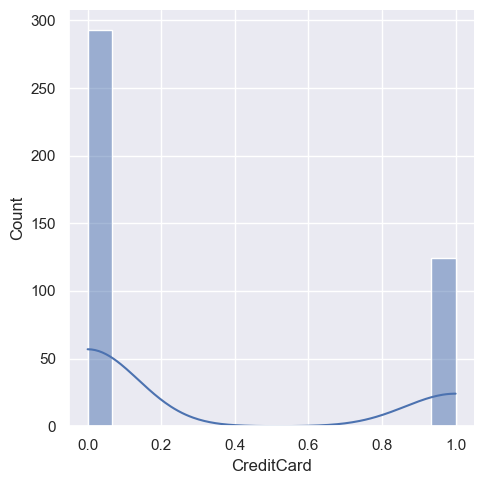

In [86]:
sns.set()
fig, axes = plt.subplots(3,4,figsize=(15,10))
# #create boxplot in each subplot
# # sns.boxplot(data=df, x='team', y='blocks', ax=axes[1,1])
sns.histplot(df2['Age'], kde=True, bins=15,ax=axes[0,0])
sns.histplot(df2['Experience'], kde=True, bins=15,ax=axes[0,1])
sns.histplot(df2['Income'], kde=True, bins=15,ax=axes[0,2])
sns.histplot(df2['Family'], kde=True, bins=15,ax=axes[1,0])
sns.histplot(df2['CCAvg'], kde=True, bins=15,ax=axes[1,1])
sns.histplot(df2['Education'], kde=True, bins=15,ax=axes[1,2])
sns.histplot(df2['Mortgage'], kde=True, bins=15,ax=axes[1,3])
sns.histplot(df2['Personal Loan'], kde=True, bins=15,ax=axes[2,0])
sns.histplot(df2['Securities Account'], kde=True, bins=15,ax=axes[2,1])
sns.histplot(df2['CD Account'], kde=True, bins=15,ax=axes[2,2])
sns.histplot(df2['Online'], kde=True, bins=15,ax=axes[2,3])
sns.displot(df2['CreditCard'], kde=True, bins=15)


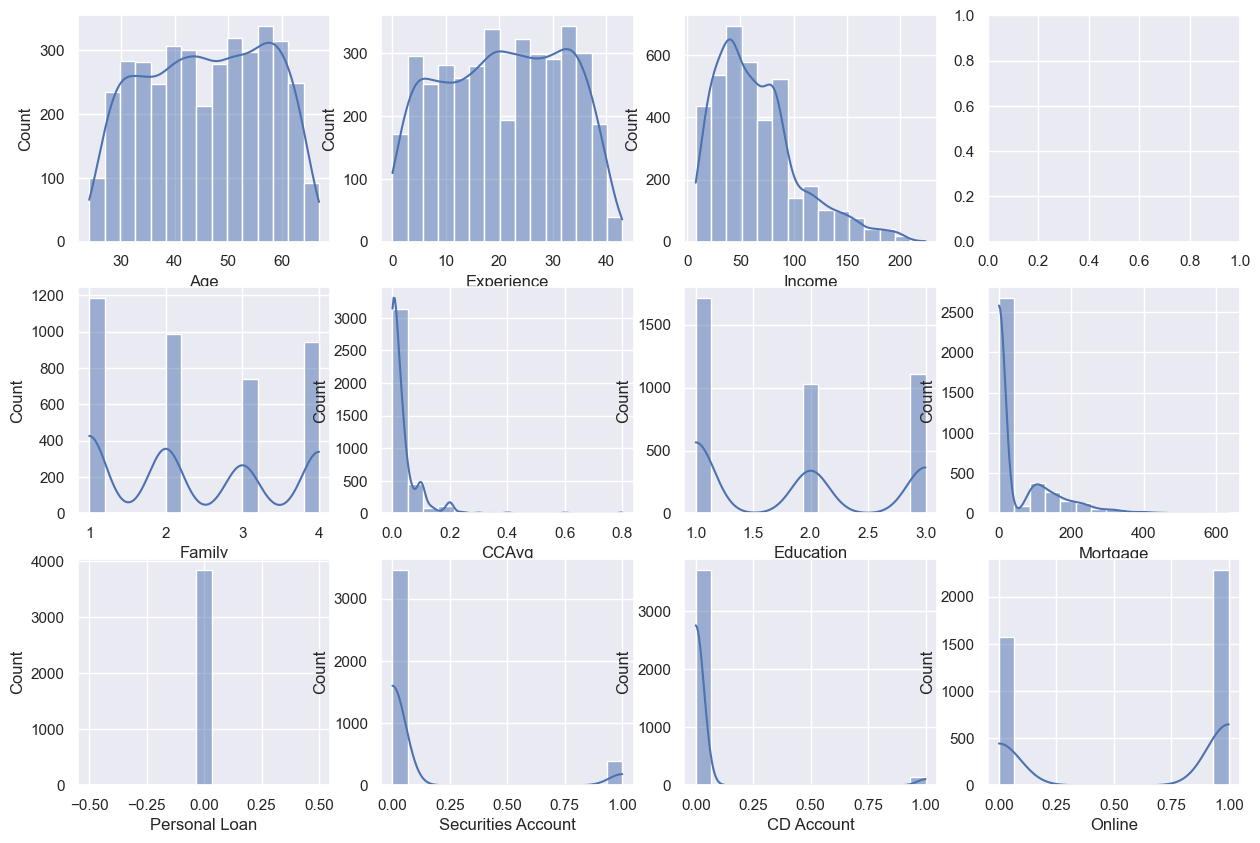

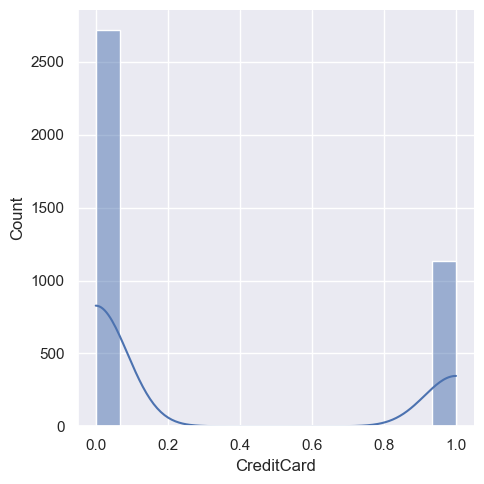

In [87]:
sns.set()
fig, axes = plt.subplots(3,4,figsize=(15,10))
# #create boxplot in each subplot
# # sns.boxplot(data=df, x='team', y='blocks', ax=axes[1,1])
sns.histplot(df3['Age'], kde=True, bins=15,ax=axes[0,0])
sns.histplot(df3['Experience'], kde=True, bins=15,ax=axes[0,1])
sns.histplot(df3['Income'], kde=True, bins=15,ax=axes[0,2])
sns.histplot(df3['Family'], kde=True, bins=15,ax=axes[1,0])
sns.histplot(df3['CCAvg'], kde=True, bins=15,ax=axes[1,1])
sns.histplot(df3['Education'], kde=True, bins=15,ax=axes[1,2])
sns.histplot(df3['Mortgage'], kde=True, bins=15,ax=axes[1,3])
sns.histplot(df3['Personal Loan'], kde=True, bins=15,ax=axes[2,0])
sns.histplot(df3['Securities Account'], kde=True, bins=15,ax=axes[2,1])
sns.histplot(df3['CD Account'], kde=True, bins=15,ax=axes[2,2])
sns.histplot(df3['Online'], kde=True, bins=15,ax=axes[2,3])
sns.displot(df3['CreditCard'], kde=True, bins=15)


In [88]:
x=df.drop(columns=['Personal Loan'])
y=df['Personal Loan'].values.reshape(-1,1)

In [89]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0) 

In [90]:
logreg=LogisticRegression(solver="liblinear")
logreg.fit(x_train,y_train.ravel())
logreg_pred=logreg.predict(x_test)

In [91]:
print(accuracy_score(y_test,logreg_pred))
print(logreg.score(x,y))

0.9653558052434457
0.9499063670411985


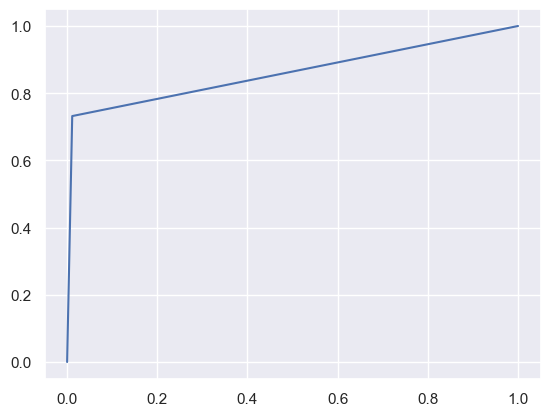

In [92]:
fpr,tpr,_=roc_curve(y_test,logreg_pred)
plt.plot(fpr,tpr)

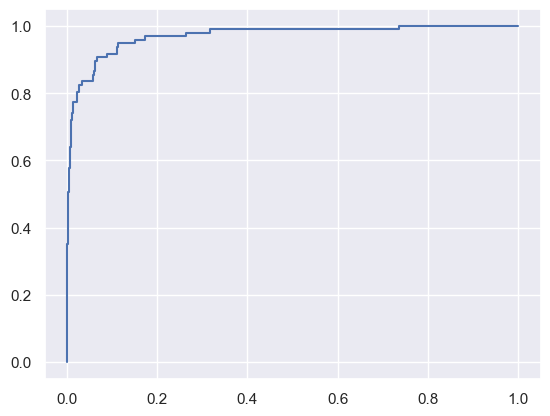

In [93]:
pred_proba=logreg.predict_proba(x_test)[::,1]
fpr,tpr,_=roc_curve(y_test,pred_proba)
plt.plot(fpr,tpr)

In [94]:
multinomial=MultinomialNB()
multinomial.fit(x_train,y_train.ravel())
multinomial_pred=multinomial.predict(x_test)

In [95]:
print(accuracy_score(y_test,multinomial_pred))
print(multinomial.score(x,y))

0.7593632958801498
0.7659176029962547


In [96]:
bernoulli=BernoulliNB()
bernoulli.fit(x_train,y_train.ravel())
bernoulli_pred=bernoulli.predict(x_test)

In [97]:
print(accuracy_score(y_test,bernoulli_pred))
print(bernoulli.score(x,y))

0.9157303370786517
0.9073033707865169


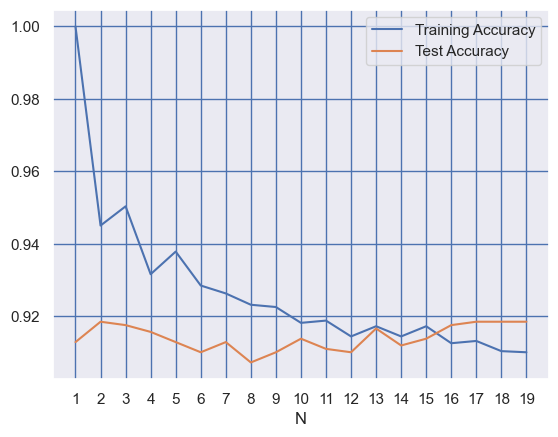

In [98]:
training_acc=[]
test_acc=[]

neighbors_setting=range(1,20)
for n in neighbors_setting:
    knn =KNeighborsClassifier(n_neighbors=n)
    knn.fit(x_train,y_train.ravel())
    training_acc.append(knn.score(x_train,y_train))
    test_acc.append(knn.score(x_test,y_test))
plt.grid( which='major', color='b', linestyle='-')
plt.plot(neighbors_setting,training_acc,label='Training Accuracy')
plt.plot(neighbors_setting,test_acc,label='Test Accuracy')
plt.xticks(range(1,20))
plt.xlabel("N")
plt.legend()
plt.show()

In [99]:
parameters={'n_neighbors':range(1,50)}
knn=KNeighborsClassifier()
grid_kn=GridSearchCV(estimator=knn,
                    param_grid=parameters,
                    scoring='accuracy',
                    cv=5,
                    verbose=1,
                    n_jobs=-1)
grid_kn.fit(x_train,y_train.ravel())

Fitting 5 folds for each of 49 candidates, totalling 245 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'n_neighbors': range(1, 50)}, scoring='accuracy',
             verbose=1)

In [100]:
print(grid_kn.best_params_)
print(grid_kn.best_score_)

{'n_neighbors': 5}
0.907619442277691


In [101]:
knn=KNeighborsClassifier(5)
knn.fit(x_train,y_train.ravel())
knn_pred=knn.predict(x_test)

In [102]:
print(accuracy_score(y_test,knn_pred))
print(knn.score(x,y))

0.9129213483146067
0.9316479400749064


array([[3798,   57],
       [ 157,  260]])

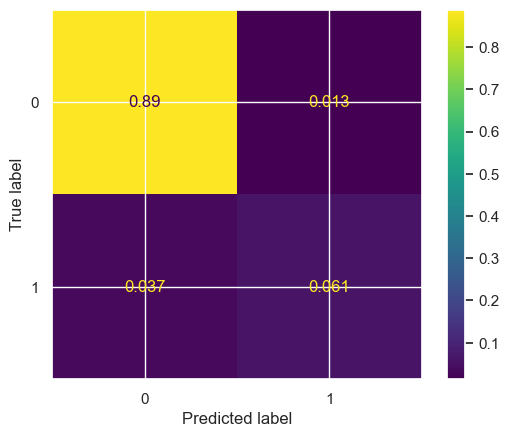

In [103]:
cm = confusion_matrix(y, logreg.predict(x), normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1'])
cmd.plot()
confusion_matrix(y,logreg.predict(x))


array([[2979,  876],
       [ 124,  293]])

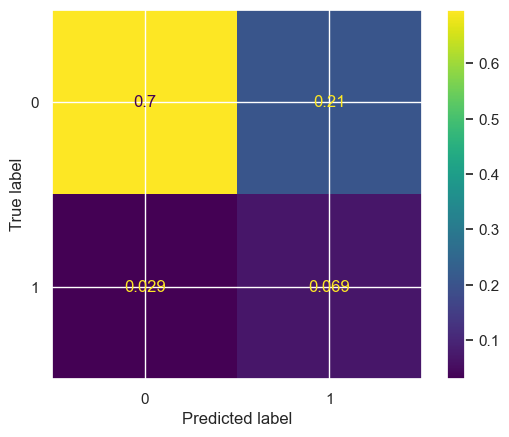

In [104]:
cm = confusion_matrix(y, multinomial.predict(x), normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1'])
cmd.plot()
confusion_matrix(y,multinomial.predict(x))


array([[3768,   87],
       [ 309,  108]])

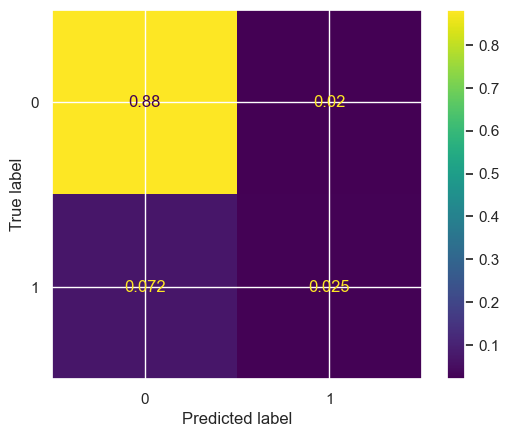

In [105]:
cm = confusion_matrix(y, bernoulli.predict(x), normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1'])
cmd.plot()
confusion_matrix(y,bernoulli.predict(x))


array([[3764,   91],
       [ 201,  216]])

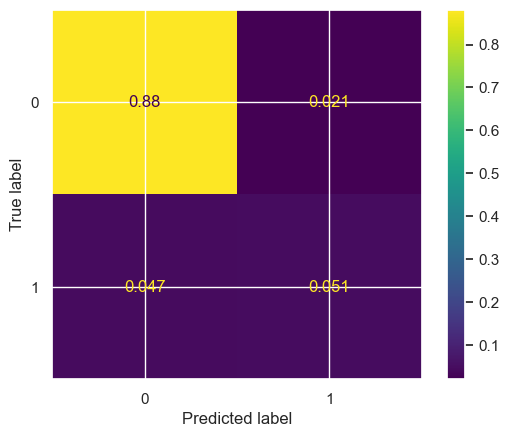

In [106]:
cm = confusion_matrix(y, knn.predict(x), normalize='all')
cmd = ConfusionMatrixDisplay(cm, display_labels=['0','1'])
cmd.plot()
confusion_matrix(y,knn.predict(x))


In [107]:
print(classification_report(y,logreg.predict(x)))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      3855
           1       0.82      0.62      0.71       417

    accuracy                           0.95      4272
   macro avg       0.89      0.80      0.84      4272
weighted avg       0.95      0.95      0.95      4272



In [108]:
print(classification_report(y,multinomial.predict(x)))

              precision    recall  f1-score   support

           0       0.96      0.77      0.86      3855
           1       0.25      0.70      0.37       417

    accuracy                           0.77      4272
   macro avg       0.61      0.74      0.61      4272
weighted avg       0.89      0.77      0.81      4272



In [109]:
print(classification_report(y,bernoulli.predict(x)))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      3855
           1       0.55      0.26      0.35       417

    accuracy                           0.91      4272
   macro avg       0.74      0.62      0.65      4272
weighted avg       0.89      0.91      0.89      4272



In [110]:
print(classification_report(y,knn.predict(x)))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      3855
           1       0.70      0.52      0.60       417

    accuracy                           0.93      4272
   macro avg       0.83      0.75      0.78      4272
weighted avg       0.93      0.93      0.93      4272



In [111]:
test_data=pd.DataFrame([{
    'Age':42,
    'Experience':16,
    'Income':30,
    'Family':3,
    'CCAvg':0.5,
    'Education':2,
    'Mortgage':0,
    'Securities Account':1,
    'CD Account':0,
    'Online':1,
    'CreditCard':1
    
    
}])

In [112]:
test_data

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,42,16,30,3,0.5,2,0,1,0,1,1


In [113]:
logreg.predict(test_data)

array([0])

In [114]:
bernoulli.predict(test_data)


array([0])

In [115]:
multinomial.predict(test_data)


array([0])

In [116]:
knn.predict(test_data)


array([0])